In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
df =pd.read_csv('retail.csv', encoding= 'unicode_escape')
df # first and last 5 rows of the datas

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [7]:
df.drop(['ADDRESSLINE2', 'STATE', 'POSTALCODE' , 'TERRITORY'], axis=1, inplace=True)

In [8]:
df.info()  # to find collumns with NAN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
CITY                2823 non-null object
COUNTRY             2823 non-null object
CONTACTLASTNAME     2823 non-null object
CONTACTFIRSTNAME    2823 non-null object
DEALSIZE            2823 non-null object
dtypes: float64(2), int64(7), object(

In [9]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [10]:
df.set_index(['ORDERDATE'], inplace=True)

In [11]:
df.sort_values('ORDERDATE', ascending=True)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,33,S24_1937,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,Germany,Keitel,Roland,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-31,10425,18,100.00,2,1895.94,In Process,2,5,2005,Trucks and Buses,115,S50_1392,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,France,Labrune,Janine,Small
2005-05-31,10425,33,100.00,4,4692.60,In Process,2,5,2005,Trucks and Buses,118,S12_4473,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,France,Labrune,Janine,Medium
2005-05-31,10425,38,100.00,12,5894.94,In Process,2,5,2005,Classic Cars,147,S10_4962,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,France,Labrune,Janine,Medium


In [12]:
print("The shape of our dataset is: ", df.shape)
#rows and column in the dataset

The shape of our dataset is:  (2823, 20)


In [14]:
print ("unique order numbers", df['ORDERNUMBER'].nunique())
print ("unique status: ", df['STATUS'].nunique())
print ("Number of countries: ", df['COUNTRY'].nunique())
print ("Unique addresses: ", df['ADDRESSLINE1'].nunique())
print ("Unique COUNTRY: ", df['COUNTRY'].nunique())
print ("Unique city: ", df['CITY'].nunique())
print ("Unique DEALSIZE: ", df['DEALSIZE'].nunique())

unique order numbers 307
unique status:  6
Number of countries:  19
Unique addresses:  92
Unique COUNTRY:  19
Unique city:  73
Unique DEALSIZE:  3


In [15]:
df1=df.groupby('COUNTRY').sum().sort_values(by='SALES', ascending=False)
df1['SALES'].nlargest(10).to_frame()

,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


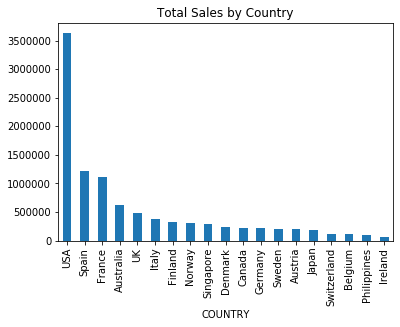

In [16]:
#to see it in bar charts
df1.SALES.plot(kind='bar', title ="Total Sales by Country", fig=(15,5))

In [17]:
# our top five customers by company name
df.groupby(['CUSTOMERNAME', 'COUNTRY']).sum().SALES.nlargest(10).to_frame()

,,SALES
CUSTOMERNAME,COUNTRY,
Euro Shopping Channel,Spain,912294.11
Mini Gifts Distributors Ltd.,USA,654858.06
"Australian Collectors, Co.",Australia,200995.41
Muscle Machine Inc,USA,197736.94
La Rochelle Gifts,France,180124.90
"Dragon Souveniers, Ltd.",Singapore,172989.68
Land of Toys Inc.,USA,164069.44
The Sharp Gifts Warehouse,USA,160010.27
"AV Stores, Co.",UK,157807.81


In [18]:
#how many customers in each country, top 7
df2=df.groupby(['COUNTRY']).nunique().CUSTOMERNAME.nlargest(7).to_frame()
df2

,CUSTOMERNAME
COUNTRY,
USA,35
France,12
Australia,5
Spain,5
UK,5
Canada,3
Finland,3


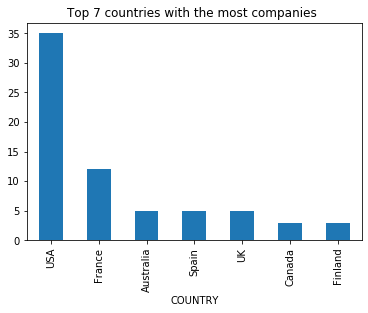

In [19]:
df2.CUSTOMERNAME.plot(kind='bar', title ="Top 7 countries with the most companies ", fig=(15,5))

# USA   
we can conclude that most customers are located in the USA and the most sales genarated was also in USA

In [35]:
usa= df[df['COUNTRY']=='USA']
usa.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,
2003-02-24,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
2003-08-25,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
2003-10-10,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
2003-10-28,10168,36,96.66,1,3479.76,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,USA,Hirano,Juri,Medium
2003-12-01,10201,22,98.57,2,2168.54,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,San Francisco,USA,Murphy,Julie,Small


In [25]:
print("USA=====")
print ("unique order numbers", usa['ORDERNUMBER'].nunique())
print ("unique status: ", usa['STATUS'].nunique())
print ("Unique addresses: ", usa['ADDRESSLINE1'].nunique())
print ("Unique COUNTRY: ", usa['COUNTRY'].nunique())
print ("Unique city: ", usa['CITY'].nunique())
print ("Unique DEALSIZE: ", usa['DEALSIZE'].nunique())

USA=====
unique order numbers 112
unique status:  5
Unique addresses:  35
Unique COUNTRY:  1
Unique city:  23
Unique DEALSIZE:  3


In [26]:
usa=usa.groupby('QTR_ID').SALES.agg(['sum'])
usa

,sum
QTR_ID,
1,750090.14
2,683935.85
3,750104.17
4,1443852.67


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022611F44308>],
      dtype=object)

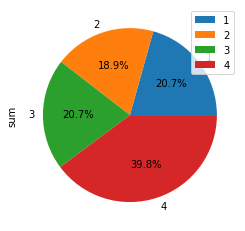

In [27]:
# create pie chart
usa.plot.pie(subplots=True,figsize=(4,4),autopct='%1.1f%%')

Most sales were recorded in qtr 4. Qtr 4 had double sales compared to other qtrs as well.

In [22]:
month=usa.groupby('MONTH_ID').SALES.agg(['sum'])
month

,sum
MONTH_ID,
1,232862.07
2,248421.79
3,268806.28
4,207625.70
5,300412.73
6,175897.42
7,207946.16
8,397979.10
9,144178.91


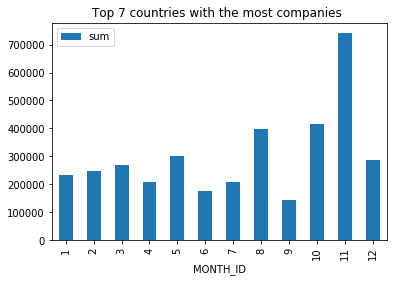

In [29]:
month.plot(kind='bar', title ="Top 7 countries with the most companies ", fig=(15,5))

The bar chart shows that October, November and December had more sales than other months, and November recorded the highest. 

In [36]:
#msrp

sales= usa['PRICEEACH'].sum()
msrp= usa['MSRP'].sum()

ans= sales-msrp
ans

-17379.350000000006

In [38]:
msrp

101539

MSRP

MSRP means manufacturer's suggested retail price. For example, 
the MSRP price for a product may be £50 but a company may sell it for £45.
Our total PRICEEACH was 84159.65
and MSRP was 101539. The difference shows that by not reccomending the manufacturer's price the company has lost 17379 and that's only in USA.

In [42]:
dealsize=usa.groupby('DEALSIZE').SALES.agg(['sum'])
dealsize

,sum
DEALSIZE,
Large,527702.38
Medium,2208362.16
Small,891918.29


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002261318D788>],
      dtype=object)

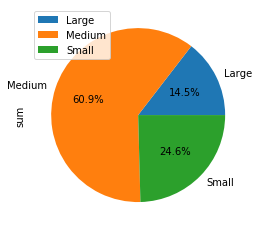

In [41]:
# create pie chart
dealsize.plot.pie(subplots=True,figsize=(4,4),autopct='%1.1f%%')

The pie chart tells us that medium deal size made almost a third of the sales.

In [25]:
usa.groupby(['PRODUCTCODE']).sum().SALES.nlargest(10).to_frame()

,SALES
PRODUCTCODE,
S18_3232,80984.25
S10_4698,79092.67
S10_1949,75354.44
S18_2238,74791.30
S12_2823,73865.04
S18_1749,62126.97
S12_3891,61616.63
S12_1108,61025.68
S18_4027,60919.53
